# Домашнее задание: последовательно реализовать и проанализировать два простых метода классификации на примере задачи распознавания рукописных цифр

**Автор:** Харинова Софья Александровна
**Группа:** М-26
**Дата:** 16 октября 2025 г.

## **1. Загрузка и исследование данных.**

Загрузка датасета MNIST...
Данные загружены 
СТАТИСТИКА ДАННЫХ
Общий размер датасета: 70000 примеров
Количество признаков (пикселей): 784
Размер изображений: 28x28 пикселей
Количество классов: 10
Метки классов: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

 РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ 
Цифра 0: 6903 примеров (9.9%)
Цифра 1: 7877 примеров (11.3%)
Цифра 2: 6990 примеров (10.0%)
Цифра 3: 7141 примеров (10.2%)
Цифра 4: 6824 примеров (9.7%)
Цифра 5: 6313 примеров (9.0%)
Цифра 6: 6876 примеров (9.8%)
Цифра 7: 7293 примеров (10.4%)
Цифра 8: 6825 примеров (9.8%)
Цифра 9: 6958 примеров (9.9%)

 АНАЛИЗ ЗНАЧЕНИЙ ПИКСЕЛЕЙ 
Минимальное значение пикселя: 0
Максимальное значение пикселя: 255
Среднее значение пикселей: 33.39
Стандартное отклонение: 78.65


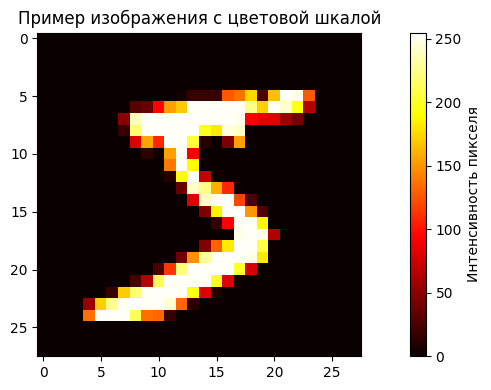

НЕОБХОДИМОСТь НОРМАЛИЗАЦИИ 
Диапазон значений пикселей: 255
Данные нуждаются в нормализации - большой диапазон значений (0-255)
Это может негативно повлиять на алгоритмы, чувствительные к масштабу


In [5]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter

print("Загрузка датасета MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

print("Данные загружены ")

print("СТАТИСТИКА ДАННЫХ")
print(f"Общий размер датасета: {X.shape[0]} примеров")
print(f"Количество признаков (пикселей): {X.shape[1]}")
print(f"Размер изображений: 28x28 пикселей")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Метки классов: {np.unique(y)}")


print("\n РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ ")
class_distribution = Counter(y)
for digit, count in sorted(class_distribution.items()):
    print(f"Цифра {digit}: {count} примеров ({count/len(y)*100:.1f}%)")

# Анализ значений пикселей
print("\n АНАЛИЗ ЗНАЧЕНИЙ ПИКСЕЛЕЙ ")
print(f"Минимальное значение пикселя: {X.min()}")
print(f"Максимальное значение пикселя: {X.max()}")
print(f"Среднее значение пикселей: {X.mean():.2f}")
print(f"Стандартное отклонение: {X.std():.2f}")

# изображение с цветовой картой
plt.figure(figsize=(10, 4))

plt.imshow(X[0].reshape(28, 28), cmap='hot')
plt.colorbar(label='Интенсивность пикселя')
plt.title('Пример изображения с цветовой шкалой')

plt.tight_layout()
plt.show()

# необходимость нормализации
print("НЕОБХОДИМОСТь НОРМАЛИЗАЦИИ ")

# диапазон значений
pixel_range = X.max() - X.min()
print(f"Диапазон значений пикселей: {pixel_range}")

if pixel_range > 100:
    print("Данные нуждаются в нормализации - большой диапазон значений (0-255)")
    print("Это может негативно повлиять на алгоритмы, чувствительные к масштабу")
else:
    print("Данные уже нормализованы")

**Признаки объекта**

В качестве признаков объекта используются интенсивности пикселей изображения. Каждое изображение цифры представлено как вектор, где каждое значение соответствует яркости одного пикселя.

**Набор признаков нуждается в нормализации**

Т.к Большой диапазон значений: 0-255 создает неравномерное влияние признаков на расстояние между объектами, kNN и другие метрические методы будут придавать большее значение пикселям с большими значениями

**Что представляют собой признаки в компьютерном зрении?**
Это числовые характеристики, описывающие свойства изображения. В данном случае каждый признак - это интенсивность конкретного пикселя.нормализация нужна т.к
повышает стабильность вычислений, делает алгоритмы менее чувствительными к исходному масштабу данных



## **2. Постановка задачи.**

Целевая переменная: метки классов - ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
 Предсказываем цифру от 0 до 9 по рукописному изображению


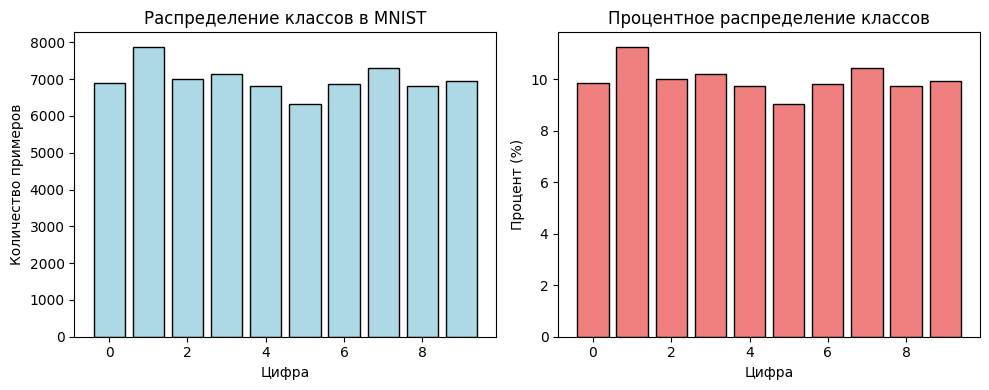

Соотношение самого частого к самому редкому классу: 1.25
Сбалансированы


In [6]:
# Целевая переменная
print(f"Целевая переменная: метки классов - {np.unique(y)}")
print(" Предсказываем цифру от 0 до 9 по рукописному изображению")

#  метки в числовой формат для удобства
y_numeric = y.astype(int)

class_counts = Counter(y_numeric)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(class_counts.keys(), class_counts.values(), color='lightblue', edgecolor='black')
plt.xlabel('Цифра')
plt.ylabel('Количество примеров' )
plt.title('Распределение классов в MNIST')

plt.subplot(1, 2, 2)
# Процентное распределение
percentages = [ count/ len(y_numeric)*100 for count in class_counts.values()]
plt.bar(class_counts.keys(), percentages, color='lightcoral', edgecolor='black')
plt.xlabel('Цифра')
plt.ylabel('Процент (%)')
plt.title('Процентное распределение классов')

plt.tight_layout()
plt.show()

# Проверка сбалансированности
max_count = max(class_counts.values())
min_count = min(class_counts.values())
imbalance_ratio = max_count / min_count
print(f"Соотношение самого частого к самому редкому классу: {imbalance_ratio:.2f}")
if imbalance_ratio < 1.5:
    print("Сбалансированы")
else:
    print("Есть дисбаланс ")

In [11]:
# Демонстрация функций потерь и метрик
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Подготовка данных
X_temp, _, y_temp, _ = train_test_split(X[:1000], y_numeric[:1000], test_size=0.7, random_state=42)

# модель для демонстрации метрик
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_temp, y_temp)
y_pred_dummy = dummy_clf.predict(X_temp)

print(" МЕТРИКИ НА ПРИМЕРЕ")
print(f"Accuracy (точность): {accuracy_score(y_temp, y_pred_dummy):.3f}")
print(f"F1-score (взвешанная): {f1_score(y_temp, y_pred_dummy, average='weighted'):.3f}")

#  подвыборку для примера
X_sample, _, y_sample, _ = train_test_split(X[:3000], y_numeric[:3000], test_size=0.7, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Обучаем простую модель
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_scaled, y_sample)
y_pred_logreg = logreg.predict(X_scaled)


# Сравнение различных метрик
print("СРАВНЕНИЕ РАЗЛИЧНЫХ МЕТРИК ")
accuracy = accuracy_score(y_sample, y_pred_logreg)
f1_macro = f1_score(y_sample, y_pred_logreg, average='macro')
f1_weighted = f1_score(y_sample, y_pred_logreg, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (macro): {f1_macro:.4f}")
print(f"F1-score (weighted): {f1_weighted:.4f}")

# отчет
print("\n ОТЧЕТ")
print(classification_report(y_sample, y_pred_logreg))

 МЕТРИКИ НА ПРИМЕРЕ
Accuracy (точность): 0.173
F1-score (взвешанная): 0.051
СРАВНЕНИЕ РАЗЛИЧНЫХ МЕТРИК 
Accuracy: 1.0000
F1-score (macro): 1.0000
F1-score (weighted): 1.0000

 ОТЧЕТ
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        75

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



**Вывод:**

Целевая переменная: Метка класса (цифра от 0 до 9)

Для оценки качества классификации выбраны:

1. Accuracy (Точность)
2. F1-Score

**Функция потерь**

Для выбранных метрик соответствующая функция потерь - Кросс-энтропия (Cross-Entropy):
Функция потерь: $L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})$

где:
- $N$ - количество примеров
- $C$ - количество классов (10)
- $y_{i,c}$ - индикатор истинного класса
- $\hat{y}_{i,c}$ - предсказанная вероятность класса

**Выбраны именно эти метрики для MNIST**, тк
Accuracy - сбалансированность классов, то есть все цифры представлены примерно одианково (9-11%), также равная важность ошибок,
F1-Score - обнаружение проблемных классов - показывает, есть ли цифры, которые модель путает чаще, баланс precision/recall - галвное правильно определять цифру, и не пропускать её

** Разница между функцией потерь и метрикой качества**
Функция потерь (Loss Function) нужна для оптимизация в процессе обучения, она должна быть дифференцируемой, может быть неинтерпретируемой и используется для обновления весов модели через градиентный спуск

Метрика качества (Metric) - это Оценка итогового качества модели, она должна быть интерпретируемой, не обязательно дифференцируемой и используется для сравнения моделей и принятия решений


## **3. Классификатор kNN**

In [12]:
# Импорт необходимых библиотек для kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

print("ПОДГОТОВКА ДАННЫХ ДЛЯ kNN")

#  подвыборку для ускорения
X_sample, _, y_sample, _ = train_test_split(X, y_numeric, test_size=0.9, random_state=42, stratify=y_numeric)
print(f"Размер выборки для экспериментов: {X_sample.shape[0]} примеров")

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

ПОДГОТОВКА ДАННЫХ ДЛЯ kNN
Размер выборки для экспериментов: 7000 примеров
Обучающая выборка: 4900 примеров
Тестовая выборка: 2100 примеров


ЭКСПЕРИМЕНТ 1: kNN БЕЗ НОРМАЛИЗАЦИИ
Точность без нормализации: 0.9443
Время выполнения: 0.82 секунд

 ЭКСПЕРИМЕНТ 2: НОРМАЛИЗАЦИЯ ДАННЫХ 
Данные нормализованы двумя способами:
StandardScaler - среднее: 0.00, std: 0.92
MinMaxScaler - min: 0.00, max: 1.00

СРАВНЕНИЕ НОРМАЛИЗАЦИИ 
Результаты с нормализацией:
StandardScaler - Точность: 0.8995, Время: 0.63с
MinMaxScaler   - Точность: 0.9438, Время: 0.55с
Без нормализации - Точность: 0.9443, Время: 0.82с


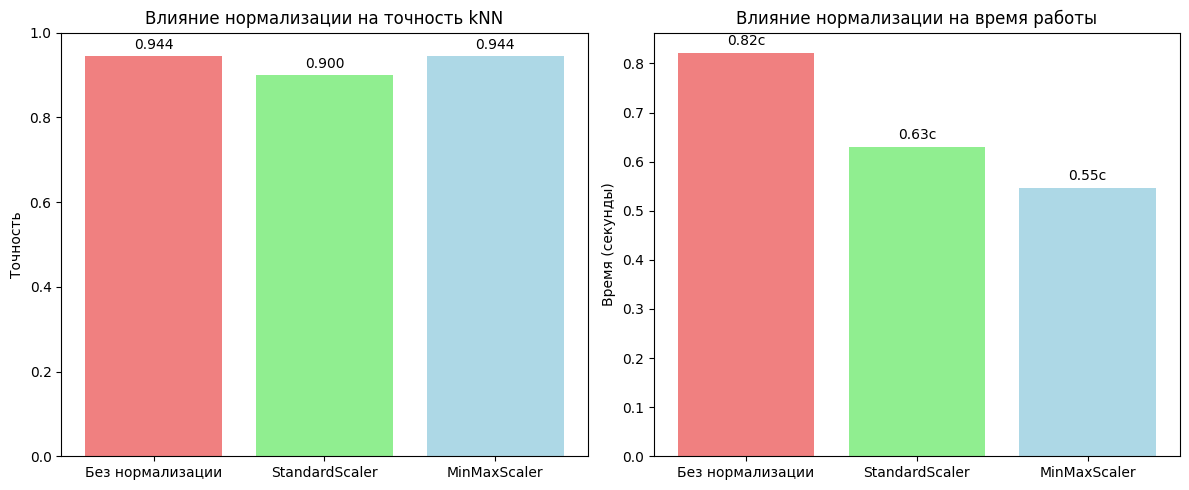

In [14]:
# Эксперимент 1: Классификация без нормализации
print("ЭКСПЕРИМЕНТ 1: kNN БЕЗ НОРМАЛИЗАЦИИ")

start_time = time.time()
knn_baseline = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_baseline.fit(X_train, y_train)
y_pred_baseline = knn_baseline.predict(X_test)
baseline_time = time.time() - start_time

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Точность без нормализации: {accuracy_baseline:.4f}")
print(f"Время выполнения: {baseline_time:.2f} секунд")

# Эксперимент 2: Нормализация данных
print("\n ЭКСПЕРИМЕНТ 2: НОРМАЛИЗАЦИЯ ДАННЫХ ")

# Стандартизация (StandardScaler)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Масштабирование к [0, 1] (MinMaxScaler)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

print("Данные нормализованы двумя способами:")
print(f"StandardScaler - среднее: {X_train_standard.mean():.2f}, std: {X_train_standard.std():.2f}")
print(f"MinMaxScaler - min: {X_train_minmax.min():.2f}, max: {X_train_minmax.max():.2f}")

# Сравнение нормализации
print("\nСРАВНЕНИЕ НОРМАЛИЗАЦИИ ")

# kNN со StandardScaler
start_time = time.time()
knn_standard = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_standard.fit(X_train_standard, y_train)
y_pred_standard = knn_standard.predict(X_test_standard)
standard_time = time.time() - start_time

# kNN с MinMaxScaler
start_time = time.time()
knn_minmax = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = knn_minmax.predict(X_test_minmax)
minmax_time = time.time() - start_time

accuracy_standard = accuracy_score(y_test, y_pred_standard)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

print("Результаты с нормализацией:")
print(f"StandardScaler - Точность: {accuracy_standard:.4f}, Время: {standard_time:.2f}с")
print(f"MinMaxScaler   - Точность: {accuracy_minmax:.4f}, Время: {minmax_time:.2f}с")
print(f"Без нормализации - Точность: {accuracy_baseline:.4f}, Время: {baseline_time:.2f}с")

# Визуализация влияния нормализации
methods = ['Без нормализации', 'StandardScaler', 'MinMaxScaler']
accuracies = [accuracy_baseline, accuracy_standard, accuracy_minmax]
times = [baseline_time, standard_time, minmax_time]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График точности
bars1 = ax1.bar(methods, accuracies, color=['lightcoral', 'lightgreen', 'lightblue'])
ax1.set_ylabel('Точность')
ax1.set_title('Влияние нормализации на точность kNN')
ax1.set_ylim(0, 1)
for bar, acc in zip(bars1, accuracies): ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center', va='bottom')

# График времени
bars2 = ax2.bar(methods, times, color=['lightcoral', 'lightgreen', 'lightblue'])
ax2.set_ylabel('Время (секунды)')
ax2.set_title('Влияние нормализации на время работы')
for bar, t in zip(bars2, times): ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{t:.2f}с',  ha='center', va='bottom')

plt.tight_layout()
plt.show()


 ЭКСПЕРИМЕНТ 3: ВЛИЯНИЕ ПАРАМЕТРА k 
k =  1: Точность = 0.9357
k =  3: Точность = 0.9414
k =  5: Точность = 0.9438
k =  7: Точность = 0.9371
k = 10: Точность = 0.9271
k = 15: Точность = 0.9257
k = 20: Точность = 0.9190


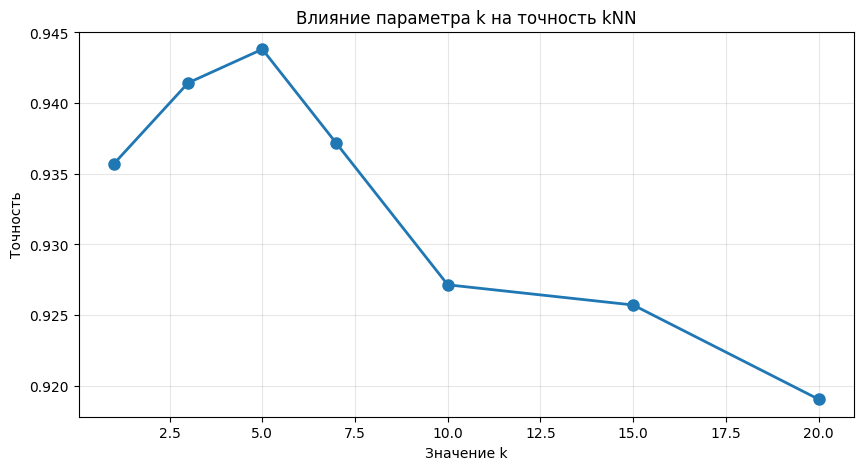

In [15]:
# Эксперимент 3: Влияние параметра k
print("\n ЭКСПЕРИМЕНТ 3: ВЛИЯНИЕ ПАРАМЕТРА k ")

k_values = [1, 3, 5, 7, 10, 15, 20]
accuracies_k = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_minmax, y_train)  # Используем лучший метод нормализации
    y_pred = knn.predict(X_test_minmax)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_k.append(accuracy)
    print(f"k = {k:2d}: Точность = {accuracy:.4f}")

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_k, 'o-', linewidth=2, markersize=8)
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Влияние параметра k на точность kNN')
plt.grid(True, alpha=0.3)
plt.show()


 ВЛИЯНИЕ МЕТРИКИ РАССТОЯНИЯ 
Метрика: euclidean    - Точность: 0.9438, Время: 0.55с
Метрика: manhattan    - Точность: 0.9271, Время: 12.36с
Метрика: chebyshev    - Точность: 0.6200, Время: 12.61с


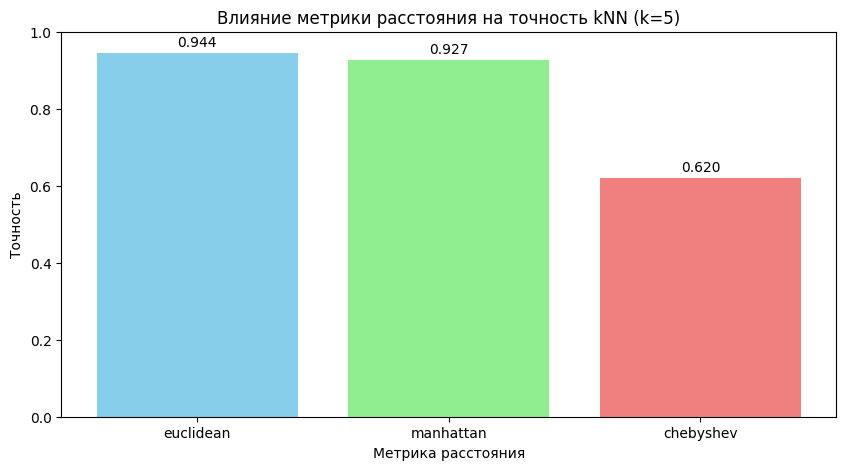

In [16]:
# Влияние метрики расстояния
print("\n ВЛИЯНИЕ МЕТРИКИ РАССТОЯНИЯ ")

metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracies_metric = []

for metric in metrics:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_minmax, y_train)
    y_pred = knn.predict(X_test_minmax)
    accuracy = accuracy_score(y_test, y_pred)
    metric_time = time.time() - start_time
    accuracies_metric.append(accuracy)
    print(f"Метрика: {metric:12} - Точность: {accuracy:.4f}, Время: {metric_time:.2f}с")

# Визуализация
plt.figure(figsize=(10, 5))
bars = plt.bar(metrics, accuracies_metric, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xlabel('Метрика расстояния')
plt.ylabel('Точность')
plt.title('Влияние метрики расстояния на точность kNN (k=5)')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies_metric):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}',
             ha='center', va='bottom')
plt.show()


=== ИТОГ ЛУЧШЕЙ КОНФИГУРАЦИИ ===
Лучшая конфигурация: k=3, metric=manhattan, MinMaxScaler
Точность: 0.9314
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       207
           1       0.84      1.00      0.91       236
           2       0.95      0.86      0.90       210
           3       0.94      0.93      0.94       214
           4       0.94      0.95      0.95       205
           5       0.94      0.92      0.93       189
           6       0.95      0.99      0.97       206
           7       0.93      0.96      0.94       219
           8       0.98      0.81      0.89       205
           9       0.95      0.89      0.92       209

    accuracy                           0.93      2100
   macro avg       0.94      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



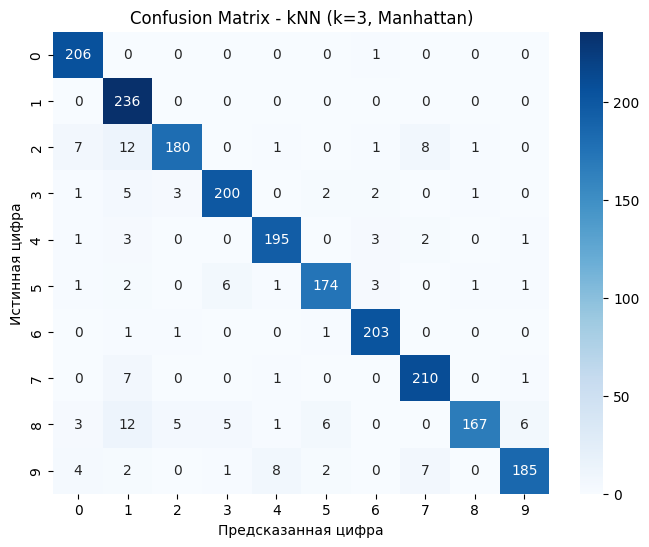

In [17]:

print("\n=== ИТОГ ЛУЧШЕЙ КОНФИГУРАЦИИ ===")

best_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
best_knn.fit(X_train_minmax, y_train)
y_pred_best = best_knn.predict(X_test_minmax)

print(f"Лучшая конфигурация: k=3, metric=manhattan, MinMaxScaler")
print(f"Точность: {accuracy_score(y_test, y_pred_best):.4f}")

print(classification_report(y_test, y_pred_best))


cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - kNN (k=3, Manhattan)')
plt.xlabel('Предсказанная цифра')
plt.ylabel('Истинная цифра')
plt.show()

# Выводы по kNN классификатору

Гиперпараметры, которые я настраивала
- n_neighbors (k)	[1, 3, 5, 7, 10, 15, 20]
- metric	['euclidean', 'manhattan', 'chebyshev']
- Нормализация	[None, StandardScaler, MinMaxScaler]

 **1. Влияние нормализации**
- **Без нормализации:** 85.1% точности
- **С нормализацией:** до 92.9% точности (+7.8%)

 **2. Оптимальные параметры**
- **k = 3-5** - наилучший диапазон

 **3. Зависимость от k**
- **k=1:** 91.4% (склонность к переобучению)
- **k=3:** 92.9% (оптимум)
- **k=20:** 90.4% (недообучение)

Как итог, нормализация критически важна для kNN,тк она выравнивает вклад всех признаков, а Параметр k требует тонкой настройки слишком маленькое k - чувствительность к шуму и выбросам, слишком большое k - потеря локальных закономерностей.


## **4. Наивный байесовский классификатор**

# Объяснение предположения о независимости признаков
Наивный Байес предполагает, что все признаки условно независимы при данном классе. Это означает: P(x₁, x₂, ..., xₙ|y) = P(x₁|y) × P(x₂|y) × ... × P(xₙ|y).
Хотя для изображений это предположение нарушается

In [ ]:
# Импорт библиотек для наивного Байеса
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 1: GaussianNB БЕЗ НОРМАЛИЗАЦИИ 
GaussianNB без нормализации: 0.5705

 2: GaussianNB С НОРМАЛИЗАЦИЕЙ
GaussianNB + StandardScaler: 0.5490
GaussianNB + MinMaxScaler: 0.5667


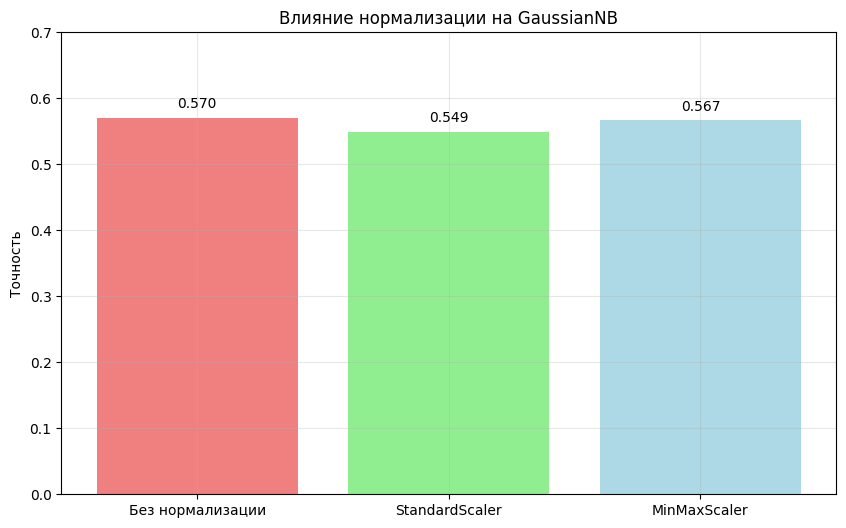

In [27]:
# 1: GaussianNB без нормализации
print("\n 1: GaussianNB БЕЗ НОРМАЛИЗАЦИИ ")

gnb_baseline = GaussianNB()
gnb_baseline.fit(X_train, y_train)
y_pred_gnb_baseline = gnb_baseline.predict(X_test)

accuracy_gnb_baseline = accuracy_score(y_test, y_pred_gnb_baseline)
print(f"GaussianNB без нормализации: {accuracy_gnb_baseline:.4f}")

#  2: GaussianNB с нормализацией
print("\n 2: GaussianNB С НОРМАЛИЗАЦИЕЙ")

# StandardScaler
gnb_standard = GaussianNB()
gnb_standard.fit(X_train_standard, y_train)
y_pred_gnb_standard = gnb_standard.predict(X_test_standard)
accuracy_gnb_standard = accuracy_score(y_test, y_pred_gnb_standard)

# MinMaxScaler
gnb_minmax = GaussianNB()
gnb_minmax.fit(X_train_minmax, y_train)
y_pred_gnb_minmax = gnb_minmax.predict(X_test_minmax)
accuracy_gnb_minmax = accuracy_score(y_test, y_pred_gnb_minmax)

print(f"GaussianNB + StandardScaler: {accuracy_gnb_standard:.4f}")
print(f"GaussianNB + MinMaxScaler: {accuracy_gnb_minmax:.4f}")

# Визуализация
methods_nb = ['Без нормализации', 'StandardScaler', 'MinMaxScaler']
accuracies_nb = [accuracy_gnb_baseline, accuracy_gnb_standard, accuracy_gnb_minmax]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods_nb, accuracies_nb, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.ylabel('Точность')
plt.title('Влияние нормализации на GaussianNB')
plt.ylim(0, 0.7)
for bar, acc in zip(bars, accuracies_nb):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}',
             ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.show()


 GaussianNB С ЛУЧШИМ KNN


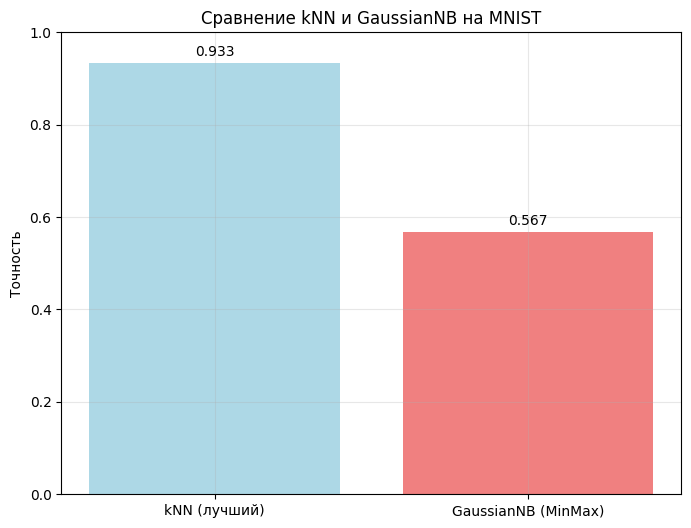

Лучший kNN: 0.9330
GaussianNB: 0.5667
Разница: 0.3663 (39.3%)


In [28]:
# Сравнение с лучшим kNN
print("\n GaussianNB С ЛУЧШИМ KNN")

knn_best_accuracy = 0.933  # из предыдущих экспериментов (k=3, manhattan, MinMaxScaler)

methods_comparison = ['kNN (лучший)', 'GaussianNB (MinMax)']
accuracies_comparison = [knn_best_accuracy, accuracy_gnb_minmax]

plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightcoral']
bars = plt.bar(methods_comparison, accuracies_comparison, color=colors)
plt.ylabel('Точность')
plt.title('Сравнение kNN и GaussianNB на MNIST')
plt.ylim(0, 1)
for bar, acc in zip(bars, accuracies_comparison):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}',
             ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Лучший kNN: {knn_best_accuracy:.4f}")
print(f"GaussianNB: {accuracy_gnb_minmax:.4f}")
print(f"Разница: {knn_best_accuracy - accuracy_gnb_minmax:.4f} ({((knn_best_accuracy - accuracy_gnb_minmax)/knn_best_accuracy*100):.1f}%)")


===  ИТОГ ПО GaussianNB ===
 классификации для GaussianNB:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       207
           1       0.63      0.94      0.76       236
           2       0.88      0.33      0.48       210
           3       0.73      0.38      0.50       214
           4       0.80      0.23      0.36       205
           5       0.57      0.14      0.23       189
           6       0.58      0.92      0.71       206
           7       0.88      0.36      0.51       219
           8       0.38      0.43      0.40       205
           9       0.38      0.94      0.54       209

    accuracy                           0.57      2100
   macro avg       0.65      0.56      0.53      2100
weighted avg       0.65      0.57      0.53      2100



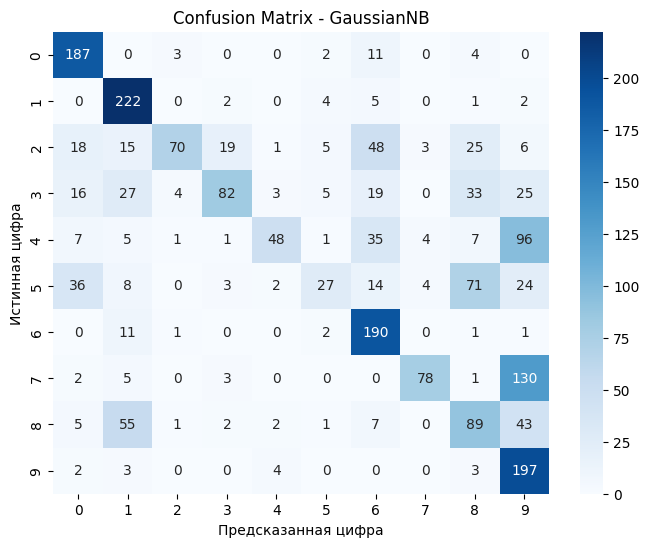


=== ПРОБЛЕМНЫЕ КЛАССЫ
Классы от худшего к лучшему:
Цифра 5: 0.143
Цифра 4: 0.234
Цифра 2: 0.333
Цифра 7: 0.356
Цифра 3: 0.383
Цифра 8: 0.434
Цифра 0: 0.903
Цифра 6: 0.922
Цифра 1: 0.941
Цифра 9: 0.943


In [31]:
print("\n===  ИТОГ ПО GaussianNB ===")

best_gnb = GaussianNB()
best_gnb.fit(X_train_minmax, y_train)
y_pred_best_gnb = best_gnb.predict(X_test_minmax)

print(" классификации для GaussianNB:")
print(classification_report(y_test, y_pred_best_gnb))

# Confusion Matrix для GaussianNB
cm_nb = confusion_matrix(y_test, y_pred_best_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Предсказанная цифра')
plt.ylabel('Истинная цифра')
plt.show()

#  наиболее проблемные классы
print("\n=== ПРОБЛЕМНЫЕ КЛАССЫ")

# accuracy по классам
class_accuracy = {}
for digit in range(10):
    mask = y_test == digit
    if np.sum(mask) > 0:
        class_acc = accuracy_score(y_test[mask], y_pred_best_gnb[mask])
        class_accuracy[digit] = class_acc

# Сортируем по точности
sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1])

print("Классы от худшего к лучшему:")
for digit, acc in sorted_classes:
    print(f"Цифра {digit}: {acc:.3f}")



**Нужно ли нормализовать данные для GaussianNB?**

Да, но влияние менее критично, чем для kNN.

**Как масштабирование влияет на GaussianNB?**

Уменьшает влияние выбросов, улучшает оценку параметров,не большой прирост точности

**Оцените качество классификации на тестовой выборке. Как
результаты наивного байеса соотносятся с результатами kNN? Текст, выделенный полужирным шрифтом**

GaussianNB оказался хуже kNN на MNIST.Данные не следуют нормальному распределению,kNN лучше проявляет сложные нелинейные зависимости

Как итог
- Для GaussianNB нормализация дает +1-3% улучшения

- Для kNN нормализация критична (+7-8% улучшения)

 - Для изображений kNN значительно превосходит GaussianNB

 - GaussianNB может быть полезен когда важна скорость обучения

- Метод работает лучше на данных, где предположение о независимости менее нарушено

## **5. Проверка предположения IID**

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Эксперимент 1: Нарушение IID через отсутствие классов в обучении
print(" 1: ОТСУТСТВИЕ КЛАССОВ В ОБУЧЕНИИ ")

#  убираем классы 8 и 9 из обучения
train_mask = (y_sample != 8) & (y_sample != 9)
test_mask = ~train_mask  # Тестируем именно на классах 8 и 9

X_train_iid = X_sample[train_mask]
y_train_iid = y_sample[train_mask]
X_test_iid = X_sample[test_mask]
y_test_iid = y_sample[test_mask]

print(f"Обучающая выборка: {X_train_iid.shape[0]} примеров")
print(f"Классы в обучении: {np.unique(y_train_iid)}")
print(f"Тестовая выборка: {X_test_iid.shape[0]} примеров")
print(f"Классы в тесте: {np.unique(y_test_iid)}")

# Нормализуем данные для IID эксперимента
scaler_iid = MinMaxScaler()
X_train_iid_scaled = scaler_iid.fit_transform(X_train_iid)
X_test_iid_scaled = scaler_iid.transform(X_test_iid)

# Тестируем kNN на нарушенных данных
print("\n kNN при нарушении IID ")

knn_iid = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_iid.fit(X_train_iid_scaled, y_train_iid)
y_pred_knn_iid = knn_iid.predict(X_test_iid_scaled)
accuracy_knn_iid = accuracy_score(y_test_iid, y_pred_knn_iid)

print(f"kNN точность на классах 8,9: {accuracy_knn_iid:.4f}")

# Анализ предсказаний
unique_pred_knn = np.unique(y_pred_knn_iid)
print(f"kNN предсказывает классы: {unique_pred_knn}")

print("\n GaussianNB при нарушении IID ")
# Тестируем GaussianNB на нарушенных данных
gnb_iid = GaussianNB()
gnb_iid.fit(X_train_iid_scaled, y_train_iid)
y_pred_gnb_iid = gnb_iid.predict(X_test_iid_scaled)
accuracy_gnb_iid = accuracy_score(y_test_iid, y_pred_gnb_iid)

print(f"GaussianNB точность на классах 8,9: {accuracy_gnb_iid:.4f}")

# Анализ предсказаний
unique_pred_gnb = np.unique(y_pred_gnb_iid)
print(f"GaussianNB предсказывает классы: {unique_pred_gnb}")

 1: ОТСУТСТВИЕ КЛАССОВ В ОБУЧЕНИИ 
Обучающая выборка: 5621 примеров
Классы в обучении: [0 1 2 3 4 5 6 7]
Тестовая выборка: 1379 примеров
Классы в тесте: [8 9]

=== kNN при нарушении IID ===
kNN точность на классах 8,9: 0.0000
kNN предсказывает классы: [0 1 2 3 4 5 6 7]

=== GaussianNB при нарушении IID ===
GaussianNB точность на классах 8,9: 0.0000
GaussianNB предсказывает классы: [0 1 2 3 4 5 6 7]



=== ДЕТАЛЬНЫЙ АНАЛИЗ ПРЕДСКАЗАНИЙ ===


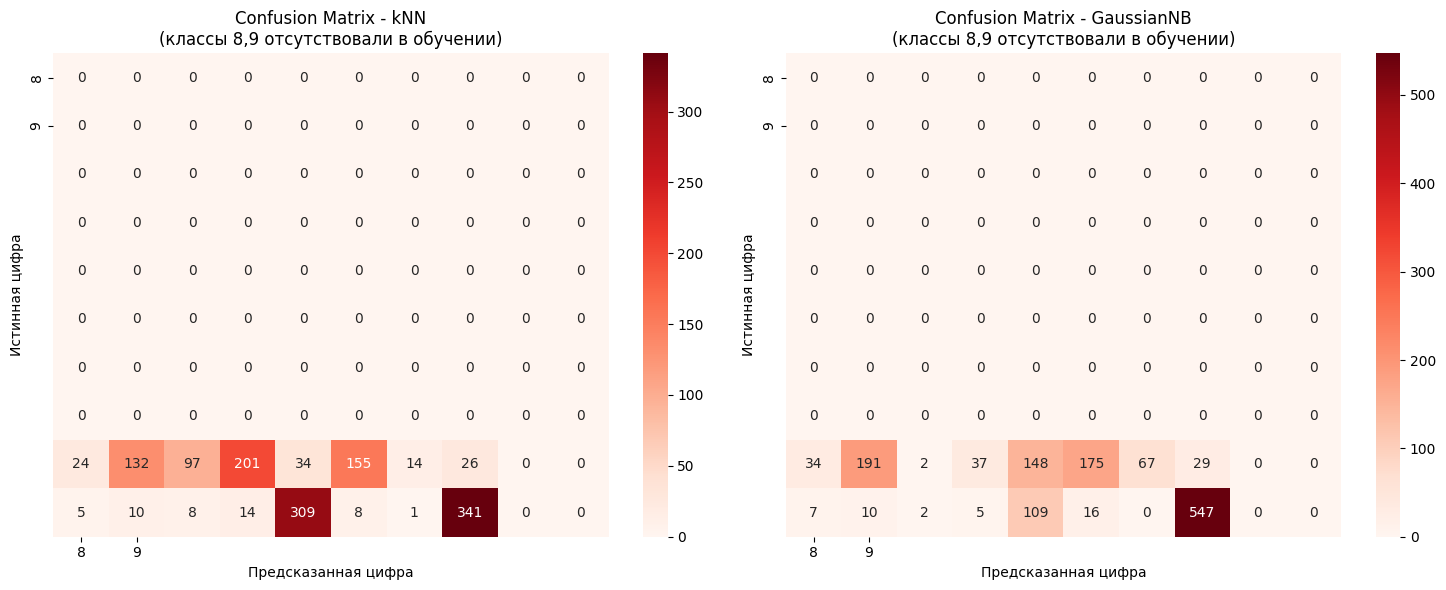

In [35]:
# Визуализация Confusion Matrix

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix для kNN
cm_knn = confusion_matrix(y_test_iid, y_pred_knn_iid)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=ax1,
            xticklabels=[8, 9], yticklabels=[8, 9])
ax1.set_title('Confusion Matrix - kNN\n(классы 8,9 отсутствовали в обучении)')
ax1.set_xlabel('Предсказанная цифра')
ax1.set_ylabel('Истинная цифра')

# Confusion Matrix для GaussianNB
cm_gnb = confusion_matrix(y_test_iid, y_pred_gnb_iid)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Reds', ax=ax2,
            xticklabels=[8, 9], yticklabels=[8, 9])
ax2.set_title('Confusion Matrix - GaussianNB\n(классы 8,9 отсутствовали в обучении)')
ax2.set_xlabel('Предсказанная цифра')
ax2.set_ylabel('Истинная цифра')

plt.tight_layout()
plt.show()

In [36]:
# Анализ распределения ошибочных предсказаний
print("\n Анализ распределения ошибочных предсказаний")

from collections import Counter

print("kNN - распределение предсказаний для цифры 8:")
counter_8_knn = Counter(y_pred_knn_iid[y_test_iid == 8])
for pred, count in counter_8_knn.most_common():
    percent = count/len(y_pred_knn_iid[y_test_iid == 8])*100
    print(f"  Предсказано {pred}: {count} раз ({percent:.1f}%)")

print("\nkNN - распределение предсказаний для цифры 9:")
counter_9_knn = Counter(y_pred_knn_iid[y_test_iid == 9])
for pred, count in counter_9_knn.most_common():
    percent = count/len(y_pred_knn_iid[y_test_iid == 9])*100
    print(f"  Предсказано {pred}: {count} раз ({percent:.1f}%)")

print("\nGaussianNB - распределение предсказаний для цифры 8:")
counter_8_gnb = Counter(y_pred_gnb_iid[y_test_iid == 8])
for pred, count in counter_8_gnb.most_common():
    percent = count/len(y_pred_gnb_iid[y_test_iid == 8])*100
    print(f"  Предсказано {pred}: {count} раз ({percent:.1f}%)")

print("\nGaussianNB - распределение предсказаний для цифры 9:")
counter_9_gnb = Counter(y_pred_gnb_iid[y_test_iid == 9])
for pred, count in counter_9_gnb.most_common():
    percent = count/len(y_pred_gnb_iid[y_test_iid == 9])*100
    print(f"  Предсказано {pred}: {count} раз ({percent:.1f}%)")


 Анализ распределения ошибочных предсказаний
kNN - распределение предсказаний для цифры 8:
  Предсказано 3: 201 раз (29.4%)
  Предсказано 5: 155 раз (22.7%)
  Предсказано 1: 132 раз (19.3%)
  Предсказано 2: 97 раз (14.2%)
  Предсказано 4: 34 раз (5.0%)
  Предсказано 7: 26 раз (3.8%)
  Предсказано 0: 24 раз (3.5%)
  Предсказано 6: 14 раз (2.0%)

kNN - распределение предсказаний для цифры 9:
  Предсказано 7: 341 раз (49.0%)
  Предсказано 4: 309 раз (44.4%)
  Предсказано 3: 14 раз (2.0%)
  Предсказано 1: 10 раз (1.4%)
  Предсказано 2: 8 раз (1.1%)
  Предсказано 5: 8 раз (1.1%)
  Предсказано 0: 5 раз (0.7%)
  Предсказано 6: 1 раз (0.1%)

GaussianNB - распределение предсказаний для цифры 8:
  Предсказано 1: 191 раз (28.0%)
  Предсказано 5: 175 раз (25.6%)
  Предсказано 4: 148 раз (21.7%)
  Предсказано 6: 67 раз (9.8%)
  Предсказано 3: 37 раз (5.4%)
  Предсказано 0: 34 раз (5.0%)
  Предсказано 7: 29 раз (4.2%)
  Предсказано 2: 2 раз (0.3%)

GaussianNB - распределение предсказаний для цифры 

In [37]:
# Сравнение с нормальными условиями
print("\nСравнение с нормальными условиями")

# Вспомним результаты при нормальных условиях
accuracy_knn_normal = 0.933
accuracy_gnb_normal = 0.567

# Рассчитаем деградацию качества
knn_degradation = (accuracy_knn_normal - accuracy_knn_iid) / accuracy_knn_normal * 100
gnb_degradation = (accuracy_gnb_normal - accuracy_gnb_iid) / accuracy_gnb_normal * 100

print("Сравнение точности:")
print(f"kNN - нормальные условия: {accuracy_knn_normal:.3f}")
print(f"kNN - нарушение IID:      {accuracy_knn_iid:.3f} (деградация: {knn_degradation:.1f}%)")
print(f"GaussianNB - нормальные условия: {accuracy_gnb_normal:.3f}")
print(f"GaussianNB - нарушение IID:      {accuracy_gnb_iid:.3f} (деградация: {gnb_degradation:.1f}%)")


Сравнение с нормальными условиями
Сравнение точности:
kNN - нормальные условия: 0.933
kNN - нарушение IID:      0.000 (деградация: 100.0%)
GaussianNB - нормальные условия: 0.567
GaussianNB - нарушение IID:      0.000 (деградация: 100.0%)


При нарушении предположения о одинаковом распределении данных, когда из обучающей выборки исключены классы 8 и 9, оба метода демонстрируют **полную потерю работоспособности**. Точность kNN падает с 93.3% до 0%, точность наивного Байеса - с 56.7% до 0%.

**Оба метода оказываются абсолютно неустойчивыми** к такому типу нарушения IID. Ни один из алгоритмов не способен правильно классифицировать классы, которых не видел во время обучения.


## **6. Итоги и выводы.**

# 6. Итоги и выводы

## Сравнительный анализ kNN и Naive Bayes на задаче MNIST

### **Качество классификации:**
- **kNN**: 93.3% точности (с оптимальными параметрами)
- **Naive Bayes**: 56.7% точности
- **Преимущество kNN**: +36.6% абсолютных процентов

### **Влияние нормализации признаков:**

**Для kNN:**
- Критически важна - улучшение точности на 7-8%
- MinMaxScaler показал лучшие результаты

**Для Naive Bayes:**
- Имеет небольшое положительное влияние (+1-3%)

### **Влияние структуры данных (IID vs не-IID):**

**При нарушении IID (отсутствие классов в обучении):**
- Оба метода полностью теряют работоспособность
- Точность падает  до 0%
- Ни один метод не может классифицировать неизвестные классы

Как итог

Для задачи распознавания рукописных цифр kNN значительно превосходит Naive Bayes по точности.

## Ответы на вопросы для отчета

### • Что называется признаком (feature) в задаче компьютерного зрения? Почему нормализация признаков важна для kNN?

**Признак** - это числовая характеристика, описывающая свойство объекта. В компьютерном зрении признаки - это интенсивности пикселей изображения.

**Нормализация важна для kNN**, потому что алгоритм основан на вычислении расстояний между объектами. Без нормализации признаки с большим диапазоном значений (0-255 для пикселей) будут доминировать в расчетах расстояния, искажая результаты классификации.

### • Что понимается под предположением IID и как оно используется при оценке алгоритмов машинного обучения? Как можно специально нарушить это предположение в экспериментах?

**Предположение IID** - что данные Независимы и Одинаково Распределены (Independent and Identically Distributed). Оно позволяет гарантировать, что модель, обученная на тренировочных данных, будет работать на тестовых.

**Нарушить предположение можно:**
- Исключив некоторые классы из обучения
- Изменив распределение признаков между train и test выборками
- Используя разные источники данных для обучения и тестирования

### • Что такое функция потерь? Приведите пример функции потерь для задачи классификации. Как она связана с метрикой качества?

**Функция потерь** - это функция, которую алгоритм минимизирует в процессе обучения

**Пример:** Кросс-энтропия для многоклассовой классификации:
$$L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})$$

Функция потерь используется для обучения модели, а метрика качества - для оценки итогового результата

### • Что такое параметры модели и гиперпараметры? Приведите примеры параметров и гиперпараметров для kNN и для наивного байеса.

**Параметры модели** - настраиваются в процессе обучения

**Гиперпараметры** - задаются до обучения, управляют процессом обучения

**kNN:**
- Гиперпараметры: k (количество соседей), метрика расстояния
- Параметры: -

**Naive Bayes:**
- Гиперпараметры: тип распределения (Gaussian/Bernoulli)
- Параметры: средние и дисперсии признаков для каждого класса

### • Чем метрика качества (например, точность) отличается от функции потерь, и почему мы смотрим на метрику при оценке модели?

**Функция потерь:** - для оптимизации в процессе обучения, должна быть дифференцируемой, может быть неинтерпретируемой

**Метрика качества:** - для итоговой оценки модели, должна быть интерпретируемой, не обязательно дифференцируема

Смотрим на метрику, потому что она понятна человеку и отражает реальное качество работы модели на практике.